<a href="https://colab.research.google.com/github/Pallavi-1608/Netflix_Movies_And_TV_Shows_Clustering_Unsupervised_ML/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

An interesting analysis was issued in 2018 indicating that since 2010, the quantity of TV series available on Netflix has almost tripled. Since 2010, the number of movies available on the streaming service has dropped by over 2,000, but the number of TV series has increased by about three times. Investigating what further insights might be obtained from the same dataset will be interesting.


I begin by understanding the dataset and then go through and clean the data in preparation for analysis.

Investigate the data and comprehend its behavior.

Next, using a variety of factors, I have prepared the dataset for cluster creation. By doing so, I can exclude stop words, white space, and other irrelevant terms to obtain significant words, which I will then use to create clusters.

Later, I developed a recommender system using cosine similarity and suggested the top ten movies using the silhouette and k-means elbow methods to determine the ideal number of clusters.



# **GitHub Link -**

https://github.com/Pallavi-1608/Netflix_Movies_And_TV_Shows_Clustering_Unsupervised_ML

# **Problem Statement**


Netflix has a huge selection of films and TV series, making it one of the biggest streaming services globally. It might be difficult for people to locate content that suits their interests, though, because there are so many possibilities available.

To overcome this issue, this project intends to employ unsupervised learning techniques to cluster comparable movies and TV series on Netflix. We can deliver more focused recommendations to users and assist them in discovering new content they will appreciate by grouping titles with comparable features.

This project will specifically analyze a dataset of Netflix titles, which will include variables such as genre, release year, actors, and storyline summary, among others. Our goal is to find groupings of films and TV series that have similar qualities by using clustering methods like K-Means or Hierarchical clustering.

The project's ultimate goal is to develop a clustering model that can precisely classify Netflix titles according to their attributes. After that, this approach can be applied to help Netflix enhance its content discovery algorithms or provide suggestions to users.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Dataset/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")


### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of dataset
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# View last 5 rows of dataset
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate= df.duplicated().sum()
print("duplicate number of rows are ",duplicate)

duplicate number of rows are  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

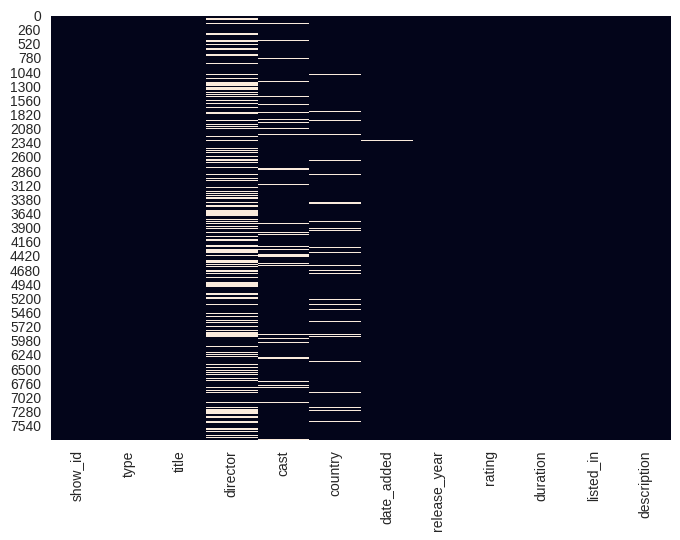

In [ ]:
# Visualizing the missing values
# checking null values ploting heatmap
sns.heatmap(df.isnull(), cbar=False)



### What did you know about your dataset?


*   The Netflix dataset includes all of tv shows and movies available on Netflix as of 2019.
*   There are 7787 rows and 12 columns provided in the data.
*   Null values are present in director, cast, country, date_added, and rating,  that need to be addressed during the data analysis process.
*   No duplicate values exist.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description :** The Summary description the movie / show



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i, "is ", df[i].nunique())

No. of unique values in  show_id is  7787
No. of unique values in  type is  2
No. of unique values in  title is  7787
No. of unique values in  director is  4049
No. of unique values in  cast is  6831
No. of unique values in  country is  681
No. of unique values in  date_added is  1565
No. of unique values in  release_year is  73
No. of unique values in  rating is  14
No. of unique values in  duration is  216
No. of unique values in  listed_in is  492
No. of unique values in  description is  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [ ]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

# Since date_added have low number of missing values, so remove from data
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Checking shape of dataframe again
df.shape

(7777, 12)

In [ ]:
# Checking null values again
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

dtype
show_id       object
type          object
title         object
director      object
cast          object
country       object
date_added    object
release_year   int64
rating        object
duration       int64
listed_in     object
description   object

In [ ]:
# Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=True)


In [ ]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month





### What all manipulations have you done and insights you found?

The label "Unknown" was used to replace any missing data in the "director," "cast," and "country" fields.

Using the mode to impute missing values in the "rating" column.


Changing the datatype 'duration' to an integer datatype.

To make the study easier, the primary country and primary genre were selected for each entry in the dataframe.

The timestamp in the 'date_added' column was converted to datetime format in order to retrieve further information and expanded the dataframe by adding new columns like "month_added" and "year_added" in order to extract more information from the data.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1    

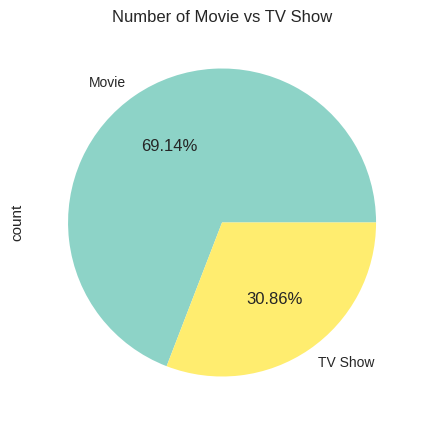

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Number of Movie vs TV Show
type_spread = df['type'].value_counts()
plt.figure(figsize=(5,5))

# Set Labels
type_spread.plot(kind = 'pie', autopct='%1.2f%%',cmap='Set3')
plt.title(f'Number of Movie vs TV Show')

# Display Chart
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole and slices of that circle or pie, to represent the specific categories that compose the whole.So that hear i have used Pie Chart, which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above figure that there is a significant difference in the types of shows that Netflix offers. 30.86% of the data is related to TV series, while 69.14% is related to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart's insights have the potential to positively impact company by offering insightful data that facilitates decision-making. Analyzing the way categories are distributed across different columns makes it easier to see trends and focus on particular target audiences or areas of interest. For instance, companies can create customized advertising campaigns depending on the shows that viewers watch the most frequently.

#### Chart - 2

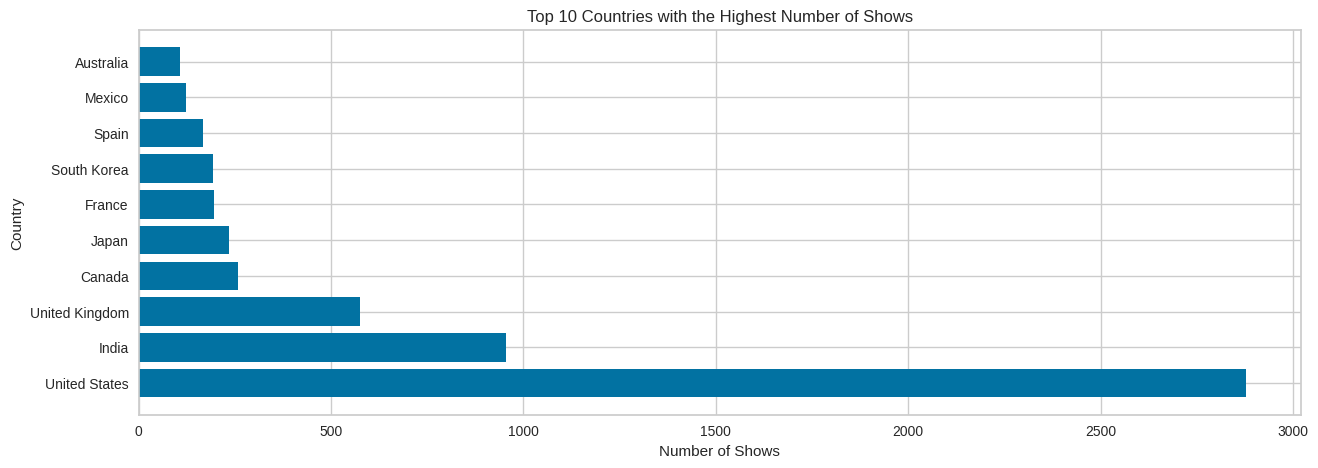

In [ ]:
# Chart - 2 Bar Chart Visualization code for Highest number of shows for top 10 countries
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
plt.barh(top_countries.index, top_countries.values)
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when we are showing segments of information.It used to compare the size or frequency of different categories or groups of data. Here I using this chart because it is useful to shows the top 10 countries with the highest number of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The United States produces more over 2,500 titles of films and television shows, making it the largest producer in the dataset. After the United States, India and United Kingdom are the next highest producing countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The enormous number of films and television series produced in the USA and India suggests that, despite their distinct cultural identities, these countries cultures and values are accepted and admired by viewers all over the world.

The leading makers of films and television series are the United States and India, which may suggest that these markets are more alluring to investors in the entertainment business.

#### Chart - 3

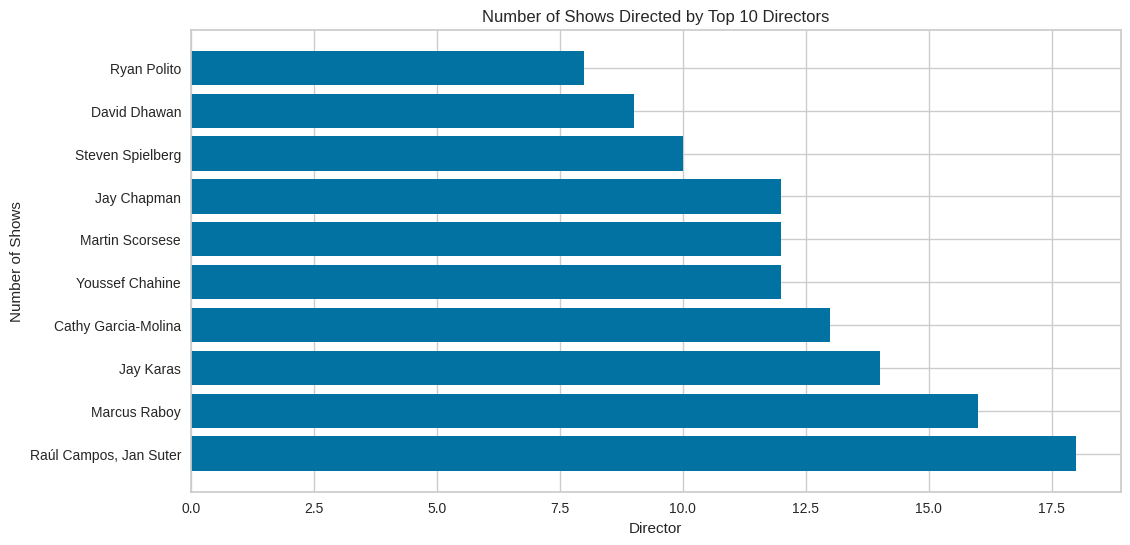

In [ ]:
# Chart - 3 Bar Chart Visualization Code for Number of Shows Directed by Top 10 Director
top_directors = df.loc[df['director'] != 'Unknown', 'director'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
plt.barh(top_directors.index, top_directors.values)
plt.title('Number of Shows Directed by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.show()


##### 1. Why did you pick the specific chart?

When presenting information in segments, bar charts are the best option.It was used to compare the quantity or frequency of various data groups or categories. The top ten directors are shown in this bar chart according to the quantity of shows they directed in the Netflix dataset. For analyzing the relation between directors and the quantity of Netflix series they have created, this chart is a suitable option.

##### 2. What is/are the insight(s) found from the chart?

Jan Suter and Raul Campos, who directed 18 shows in the dataset are the top directors in terms of the number of shows they have directed.

Marcus Raboy, who has directed 16 shows, is the second most well-liked director.

The majority of the top ten filmmakers have directed 7 to 11 Netflix series.

With the exception of Indian filmmaker David Dhawan, who filmed 9 Netflix series, the majority of the top ten directors are from US.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The enormous number of films and television series produced in the USA and India suggests that, despite their distinct cultural identities, these countries cultures and values are accepted and admired by viewers all over the world.

The leading makers of films and television series are the United States and India, which may suggest that these markets are more alluring to investors in the entertainment business.

#### Chart - 4

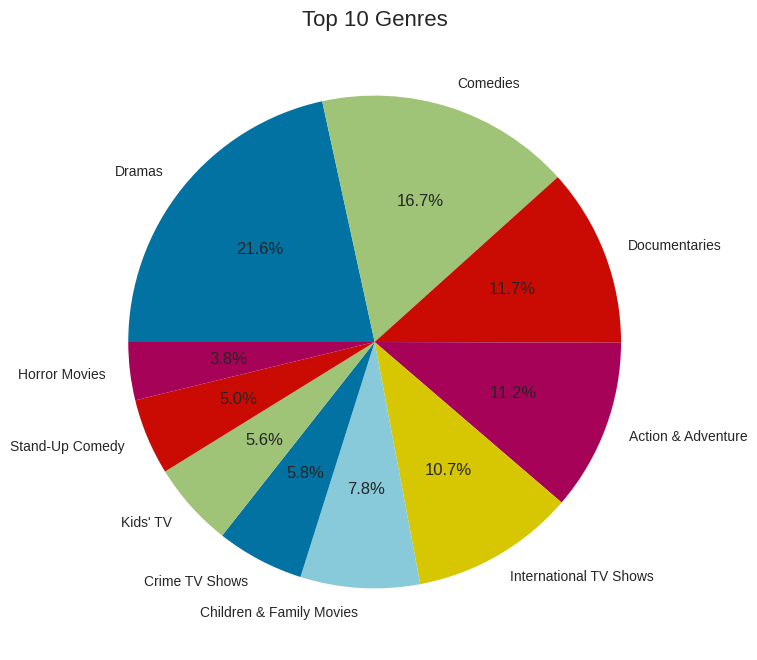

In [ ]:
# Chart - 4 Pie Chart Visualization Code For Top 10 Genres in NetFlix Dataset

top_genres = df["listed_in"].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.title("Top 10 Genres",fontsize = 16)
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=180, counterclock=False)
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole and slices of that circle or pie, to represent the specific categories that compose the whole.So that hear I have used Pie Chart, which helped us to get the percentage comparison of top Genres more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

For each of the top 10 genres in the dataset, the percentage share is displayed as a pie chart. Dramas are the most popular genre in the dataset, followed by comedies and documentaries, as this chart shows us. It also displays how an extensive portion of the dataset is comprised of the top 10 genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart's insights can benefit Netflix's business by giving them a better understanding of its audience's preferences for content. By using this information, they can make better-informed judgments about the kind of contents they should create and consume, which will help them bring  more viewers and money.

#### Chart - 5

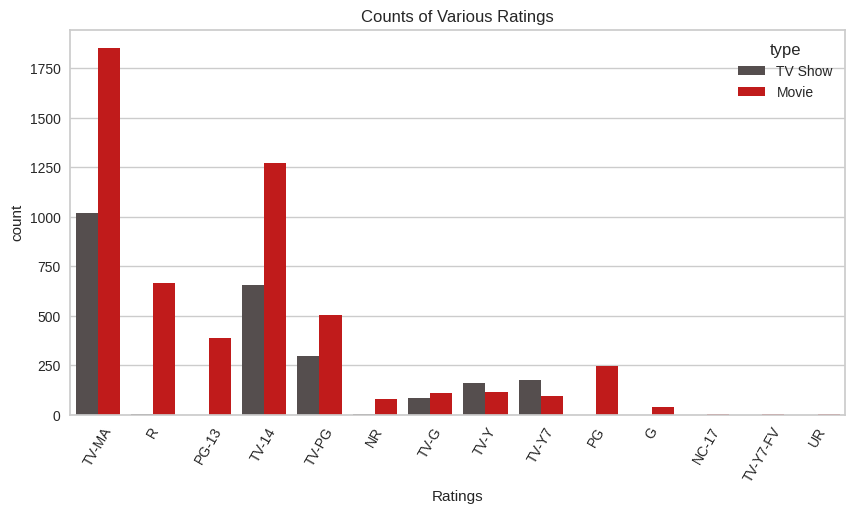

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1850
          TV Show    1018
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [ ]:
# Chart - 2 Bar Chart Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=df, palette=['#564d4d', '#db0000'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(df.groupby(['rating', 'type']).size())


**Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series**


**Little Kides**- --> G, TV-Y, TV-G

**Older Kids**---> PG, TV-Y7, TV-Y7-FV, TV-PG

**Teens**---> PG-13, TV-14

**Mature**---> R, NC-17, TV-MA

##### 1. Why did you pick the specific chart?

Bar charts should be used when we are showing segments of information.It used to compare the size or frequency of different categories or groups of data. Here I using this chart because it is useful to show counts of various ratings on Netflix TV shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA (Mature Audiences) followed by TV-14 (Teens) and TV-PG (Older kids). the least ratings are given by NC-17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could impact decisions related to the production and acquisition of content, which could have a beneficial impact on the business. The most popular rating on the platform, for instance, is TV-MA, indicating a high demand for mature content. This information could help determine what kinds of content to create or acquire.

#### Chart - 6

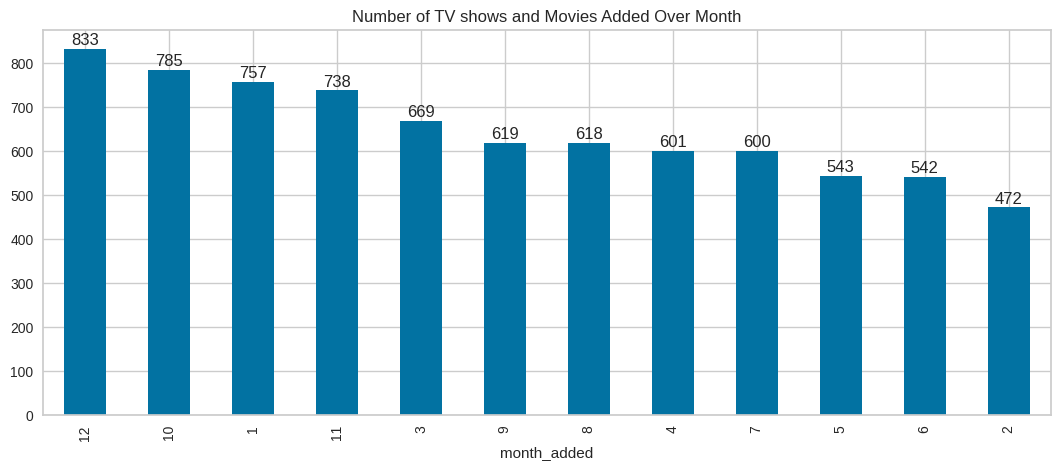

In [ ]:
# Store Counts of Month Values
df_month_added = df['month_added'].value_counts()

# Chart - 6 Bar Chart visualization code for Number of TV shows and Movies Added Over Month
plt.title('Number of TV shows and Movies Added Over Month')
ax=df_month_added.plot(kind='bar', figsize=(13,5))
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when we are showing segments of information.It used to compare the size or frequency of different categories or groups of data. Here I using this chart because it is useful to show counts of various ratings on Netflix TV shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

Based on the graph above, it can be seen that the majority of shows are posted toward the end or beginning of the year.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart may point up opportunities for improvement but it doesn't always provide negative growth insights. Netflix may want to think about releasing more original content during those months or making more content during months when there aren't as many releases. Additionally, Netflix could need to think about modifying their release schedule if certain months see a lot of additions in order to prevent overcrowding the site with a lot of content simultaneously.

#### Chart - 7

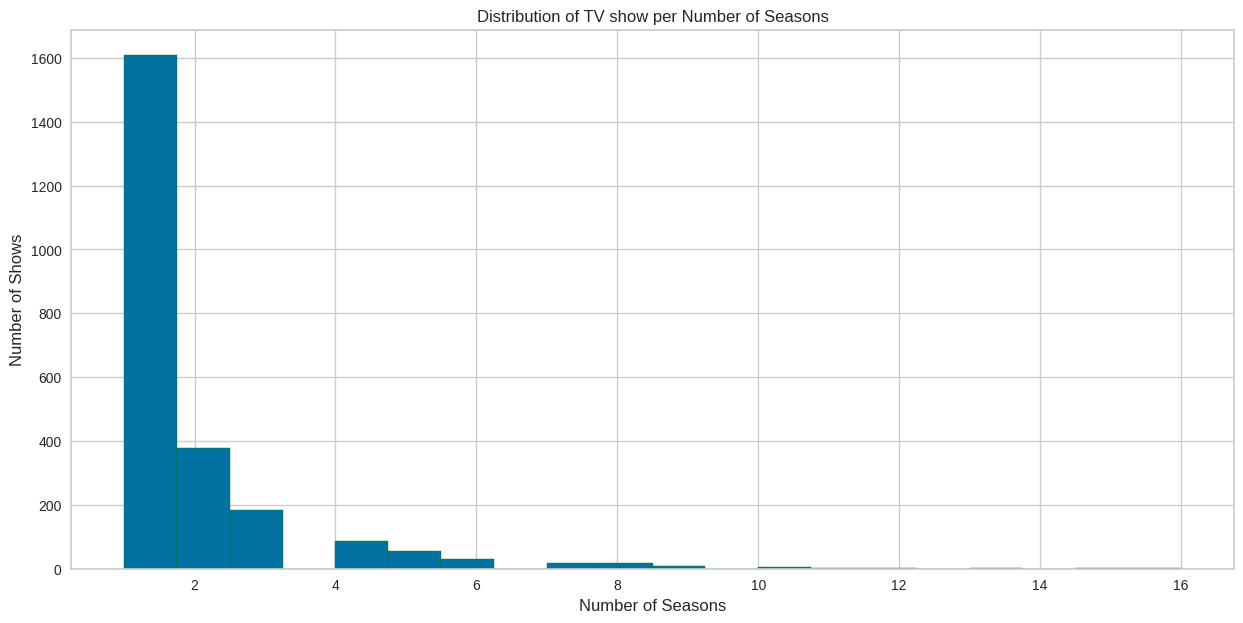

In [ ]:
# Chart - 7 Visualization Code For Distribution of TV show per Number of Seasons
tv_shows = df[df['type'] == 'TV Show']
plt.figure(figsize=(15, 7))
plt.hist(tv_shows['duration'], bins=20, edgecolor='green')
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.title('Distribution of TV show per Number of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram is good for the graphical representation of numerical data distribution.so for better undersating of distribution of different TV show per number of seasons histogram used.

##### 2. What is/are the insight(s) found from the chart?

Most television programs run for one to three seasons.

A few TV series have more than ten seasons, but they are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information may be useful to Netflix when deciding how many seasons to order for new programs. It implies that shorter seasons could be more well-liked and profitable.

Additionally, this information might be useful in negotiating the duration of a TV show with production companies.


#### Chart - 8

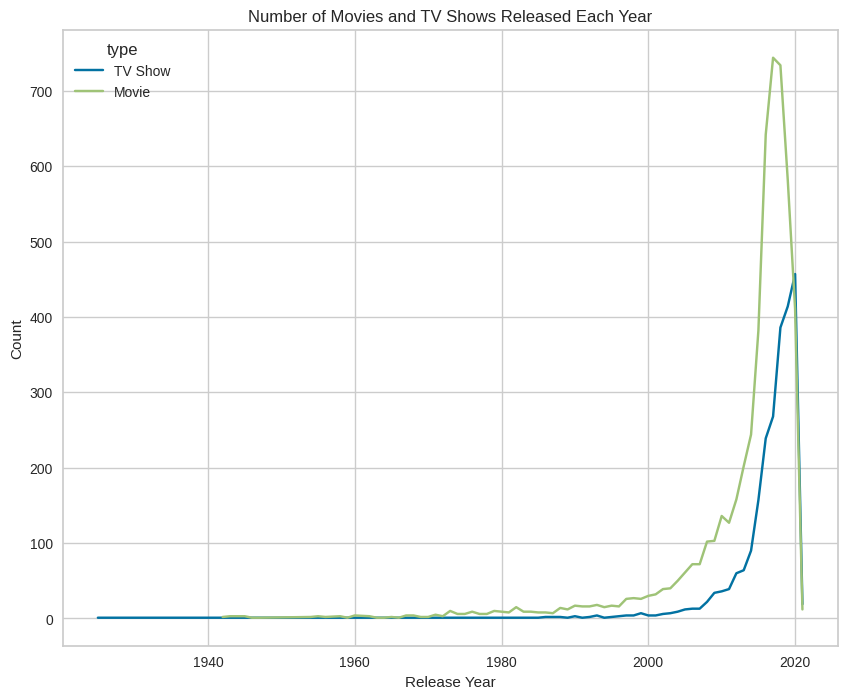

In [ ]:
# Chart - 8 Visualization Code For Number of Movies and TV Shows Released Each Year
df_release_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_release_year, x='release_year', y='show_id', hue='type')
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this graph because it offers an interesting insight, how TV series and films have been distributed throughout time. The numbers of films and TV shows that are released every year are trended in the line plot, and it is simple to compare the two due to their distinct lines.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the TV shows and Movies on netflix are of the release date from 2010 to 2020.

Growth in the number of movies on Netflix is much higher than TV shows. It appears that Netflix has focused more attention on increasing Movie content that TV Shows.

2020 saw a drop in the amount of new films released; this could be related to the lockdowns brought on by COVID-19, which prevented new shows from being produced. There are fewer movies added this year because the Netflix data we have access to only goes until 2021.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge acquired may have a beneficial effect on company by giving insight into Netflix's content-producing trend. Netflix can make strategic judgments about what kind and quantity of content it will create in the future by analyzing the trend.


#### Chart - 9

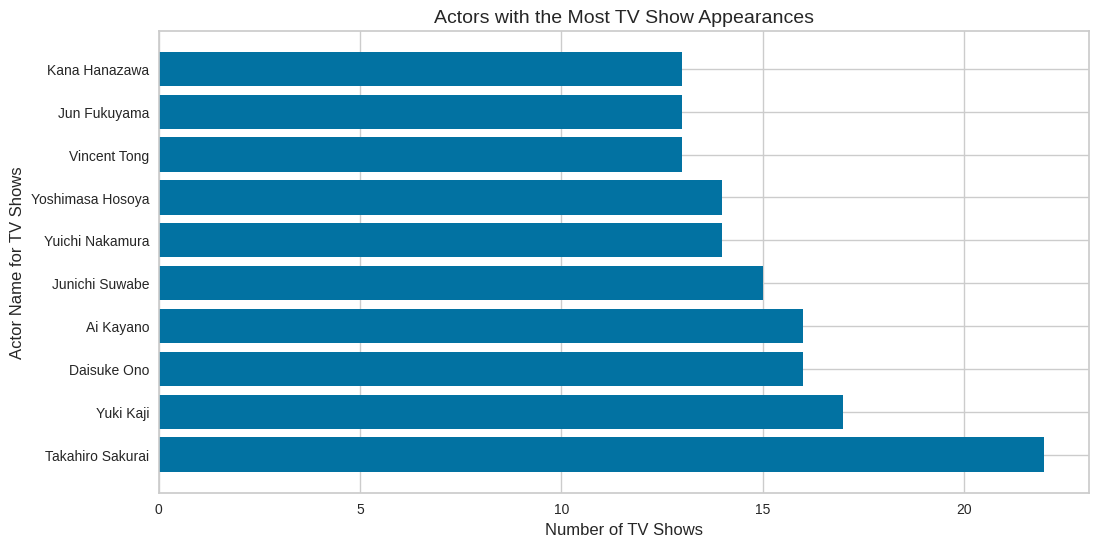

In [ ]:
# Chart - 9  Bar Chart Visualization Code for Actors with the Most TV Show Appearances
tv_shows = df[(df['type'] == 'TV Show') & ~(df['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_actors.index, top_actors.values)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

This graph uses a horizontal bar plot to display the top 10 actors with the most TV program appearances. People who work in the entertainment industry or are interested in popular culture may find this chart helpful in determining which actors are most frequently cast in TV shows.



##### 2. What is/are the insight(s) found from the chart?

The top ten actors who have made the most appearances in Netflix TV series are displayed on the chart. The chart reveals that Takahiro Sakurai has starred in the most Netflix TV series, with Yuki Kaji and Daisuke Ono following closely behind. These insights may be utilized to determine which well-known actors might attract viewers for the premiere of new TV series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By selecting actors for TV series more carefully, the insights acquired could have a favorable impact on business. A TV show's viewership may increase if well-known actors are cast in it, which would benefit the industry. It is crucial to remember that an actor's fame does not always translate into success, since the caliber of the TV program itself plays a big role.

#### Chart - 10

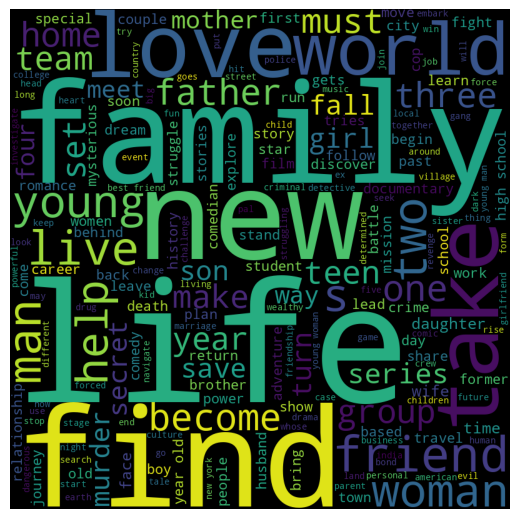

In [ ]:
# Chart - 10 WordCloud Chart Visualization Code

comment_words = ' '.join(df['description'].astype(str).str.lower())
stopwords = set(STOPWORDS)                                   # Define the stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Using the descriptions of each show and movie in the Netflix dataset, the code above creates a word cloud. Seeing the most frequently recurring terms in the descriptions quickly is a good idea because this chart is a visualization of text data. It provides information on the subjects and genres of Netflix's television series and movies.

##### 2. What is/are the insight(s) found from the chart?

This chart may provide insights about the most frequently used terms and phrases in the descriptions. This can assist in determining current trends and topics people are interested in. Finding some distinct terms or phrases to target particular user segments or utilize in marketing can also be helped by it.

Life, family, friends, love, and other terms are frequently used in descriptions, as the wordcloud shows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By helping Netflix better understand its audience's needs and provide its content to suit their interests, these insights can have a positive commercial impact. Netflix can enhance user experience and develop more focused marketing campaigns by recognizing popular themes and genres.


#### Chart - 11

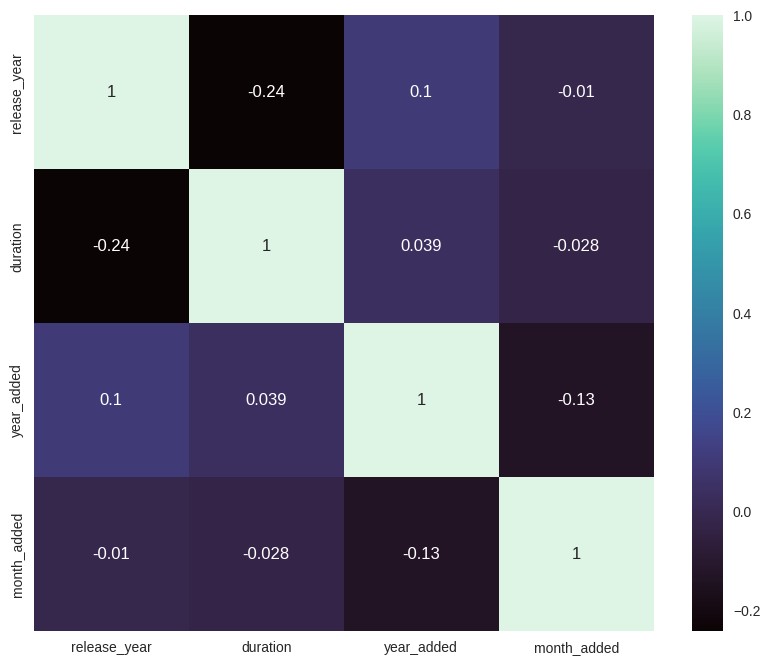

In [ ]:
# Chart - 11 visualization code Correlation Heatmap
# Select only numeric columns from the DataFrame
numeric_columns_df = df.select_dtypes(include=['int64', 'int32'])

plt.figure(figsize=(10,8))
correlation = numeric_columns_df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a powerful tool for identifying relationships between pairs of variables in a dataset. The color-coding allows us to see at a glance whether variables are positively correlated (similar movements) or negatively correlated (opposite movements). The colors in the heatmap represent the strength of the correlation, with brighter colors indicating stronger correlations and darker colors indicating weaker or no correlations. The range of correlation is from -1 to 1. So, I used a correlation heatmap to find the relationships among duration,release year, year added.

##### 2. What is/are the insight(s) found from the chart?

This visualization can be helpful in identifying the strength and direction of the relationship between different variables in the dataset. By analyzing the heatmap, we can see which variables have a strong positive or negative correlation with each other. This information can be useful in making predictions and building machine learning models.

We can see that duration and release year are negatively correlated by 24%.

year added and release year are positively correlated by 10%.

#### Chart - 15 - Pair Plot

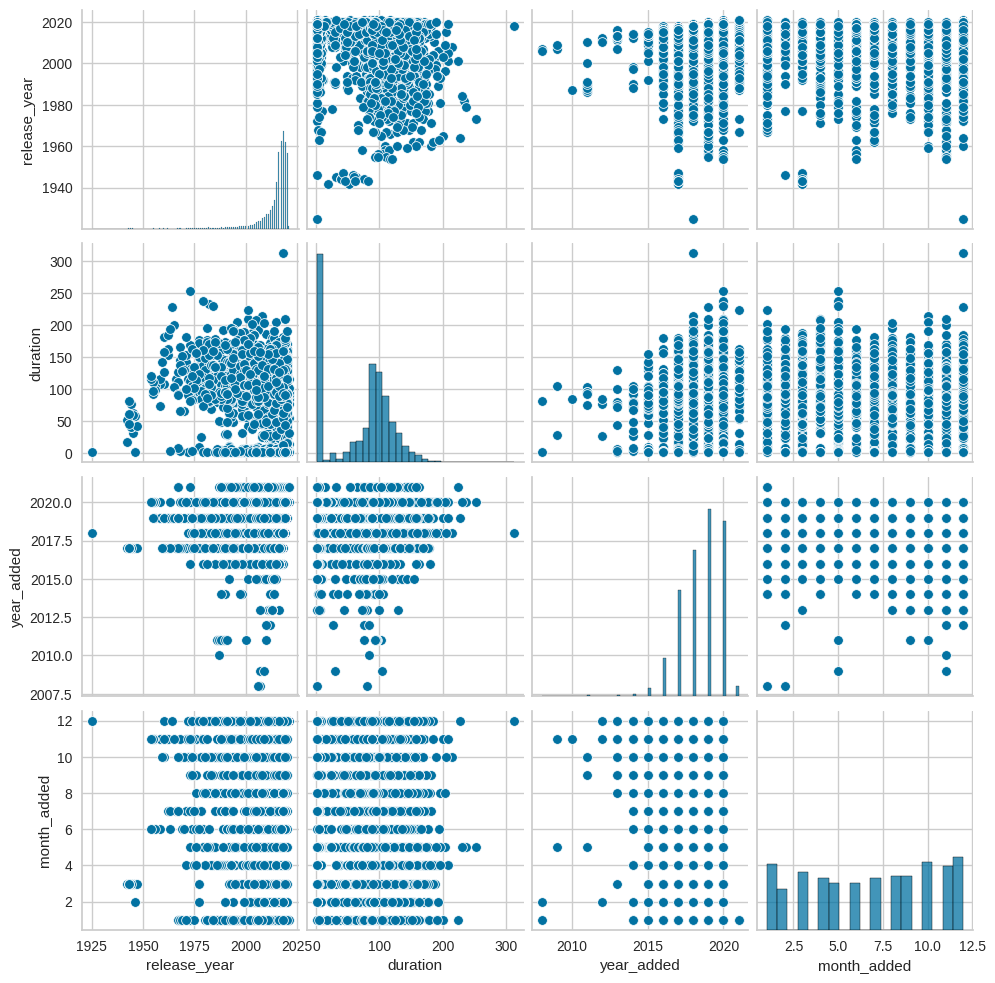

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot provides a scatter plot matrix of all numerical variables in the dataset, and histograms along the diagonal which can help visualize the relationships between each pair of variables.

##### 2. What is/are the insight(s) found from the chart?

The way that each variable is distributed, The diagonal plots show us each variable's range and distribution. It appears that there are specific ranges in which the durations of TV shows and movies are distributed.

correlation between the variables, Each pair of variables' scatter plots are displayed, along with the correlation coefficient. The length of movies and TV shows appears to positively correlate with their release year, suggesting that more recent productions typically have longer runs.

Any outliers in the data from the scatter plots are also visible to us. In comparison to the rest of the dataset, there appears to be a movie that is extremely long.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:** The difference in the average duration of movies and TV shows on Netflix.

**Hypothesis 2:**  Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.

**Hypothesis 3:** The difference in the average duration of movies and TV shows on Netflix.

### Hypothetical Statement - 1



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement - 1** - The difference in the average duration of movies and TV shows on Netflix.

**Null Hypothesis** - There is no significant difference in the average duration of movies and TV shows on Netflix.

**Alternative Hypothesis** - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:

# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis. \n Hence there is no significant difference in the average duration of movies and TV shows on Netflix.")
else:
    print("Reject null hypothesis. \n Hence there is significant difference in the average duration of movies and TV shows on Netflix.")


Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis. 
 Hence there is significant difference in the average duration of movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The two-sample t-test is the statistical test that was used to determine the p-value. We are comparing the means of two independent samples (the lengths of TV shows and movies), and we want to know if there is a statistically significant difference between the sample means or if it might have happened by chance. For this reason, we picked this test.

##### Why did you choose the specific statistical test?

The samples must be independent, have a normal distribution, and have unequal variances in order for the two-sample t-test to be used. In this instance, we made the assumption that the two samples are independent and that the lengths of Netflix's TV series and films are normally distributed. Because the variance of TV show and movie durations may fluctuate based on the content, the assumption of unequal variances was also used.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement - 2** - Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.

**Null Hypothesis -** There is a no significant difference in average number of movies produced by the 'United States' and 'India'

**Alternative Hypothesis -** There is a significant difference in average number of movies produced by the 'United States' and 'India'

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df[df.country == 'United States']
india_movie_df = df[df.country == 'India']


# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", t_stat)
print("p-value:", p_val)

# Interpret the result
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")


Two-sample t-test statistic: 4.432473815606923
p-value: 9.92184267549747e-06
Since p-value (9.92184267549747e-06) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

I used an independent samples t-test, sometimes referred to as an unpaired t-test or two-sample t-test, to compare the quantity of movies that are available on Netflix in the US and India. I conducted the test using the ttest_ind function from the scipy.stats module, which is appropriate for examining the means of two independent samples. I was able to calculate the p-value and ascertain whether there is a significant variation in the quantity of movies in the two countries by using this test.

##### Why did you choose the specific statistical test?

Since the two-sample t-test is appropriate for comparing the means of two independent samples, I chose it for this analysis. In this instance, we have two distinct sets of Netflix movie data for the US and India, and our goal is to find out if the average number of movies in two countries differs noticeably.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement - 3** - Difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Null Hypothesis:** There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis:** There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['listed_in'].str.contains('Dramas') | df['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  7.253964957694196
p-value:  4.0474487608032336e-13
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

All of the missing values were already taken care of in the data wrangling section.

### 2. Handling Outliers

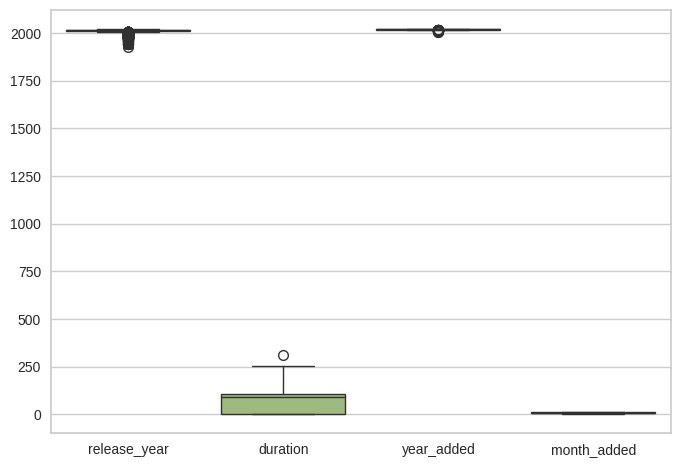

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)
plt.show()

No need to handle the outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer here

### 3. Categorical Encoding

Not required

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Create a new column called 'text' in the DataFrame 'df'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
df['text'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast'] + ' ' + df['director']


In [ ]:
# checking our result
print(df['text'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Unknown


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(y):
  return y.lower()

# Apply the to_lower() function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(to_lower)

# Cross checking our result
print(df['text'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi unknown


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation) # Replace each punctuation mark with no space, effectively deleting it from the text
  text_without_punct = text.translate(translator)
  return text_without_punct

# Apply the remove_punctuation function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(df['text'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'text' column does not have any URLs so remove words and digits containing digits
df['text'] = df['text'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(df['text'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

# function to remove stop words
def remove_stop_words(x):

  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function
df['text'] = df['text'].apply(remove_stop_words)

# Cross-check our result
print(df['text'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown


In [ ]:
# Remove White spaces
df['text'] = df['text'].str.strip()

# Cross-check our result
print(df['text'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown


#### 6. Rephrase Text

Not Required

#### 7. Tokenization

In [ ]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'text' column of the DataFrame
df['text'] = df['text'].apply(nltk.word_tokenize)

# Cross-check our result
print(df['text'][0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi', 'unknown']


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(stemming)

# Cross-check our result
print(df['text'][0])



futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown


##### Which text normalization technique have you used and why?

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms. For example, stemming would reduce "running," "runner," and "ran" to the base form "run." This can be useful in tasks such as information retrieval or text classification where the specific form of a word is not important, and it can also help in reducing the size of the vocabulary. There are several stemmers available in python such as Porter stemmer, Snowball stemmer and Lancaster stemmer.

We will utilize **SnowballStemmer** to construct a meaningful word from a word corpus.

Snowball is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it. It was originally designed and built by Martin Porter. SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique.

#### 9. Part of speech tagging

Not needed

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
new_df = df[['title', 'text']]
new_df.head()

title                                               text
0     3%  futur elit inhabit island paradis far crowd sl...
1   7:19  devast earthquak hit mexico citi trap survivor...
2  23:59  armi recruit found dead fellow soldier forc co...
3      9  postapocalypt world ragdol robot hide fear dan...
4     21  brilliant group student becom cardcount expert...

In [ ]:
# using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(max_features=20000)
x= t_vectorizer.fit_transform(new_df['text'])

x.shape

(7777, 20000)

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(df['text'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
#number of independet features created from "text_data" columns
print(len(dictionary))

9000


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['text']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 9000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

I applied the text vectorization method known as TF-IDF (Term Frequency-Inverse Document Frequency).

The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Not Required

#### 2. Feature Selection

Not Required

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

This data is in form of Text VectorizationNo  so no need to transform

### 6. Data Scaling

##### Which method have you used to scale you data and why?

Here the units of whole data are same so no need to do scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, as the number of features (words in this case) is high, so to reducing features and increase computational performance, dimensionality reduction is a helpful technique because, it eliminates the variables in the model that aren't really significant. also this will take out some of the noise in the data and simplify the model.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x.toarray())

PCA()

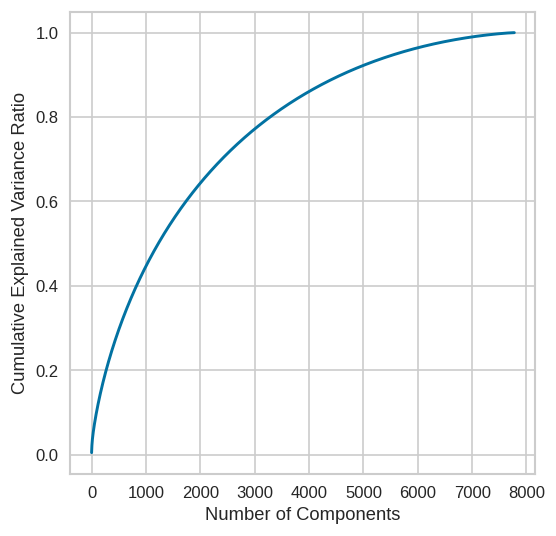

In [ ]:
# PLot a graph for PCA
# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio versus the number of components
plt.figure(figsize=(5, 5), dpi=120)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [ ]:
pca_tuned = PCA(n_components=0.95)
x_dense = x.toarray()
pca_tuned.fit(x_dense)
x = pca_tuned.transform(x_dense)
print(x.shape)

(7777, 5611)


In [ ]:
x

array([[ 6.65998625e-02, -5.84324381e-02, -8.95615267e-03, ...,
        -8.67973590e-03, -1.24466367e-03,  5.91985862e-03],
       [-3.57012009e-02, -2.04300722e-02,  2.07801921e-02, ...,
        -8.10395885e-04, -9.85200373e-03, -6.76537611e-03],
       [-4.05389197e-02, -3.20538266e-02, -4.97768130e-02, ...,
        -3.89897082e-03,  7.64393154e-03, -5.22402833e-03],
       ...,
       [ 1.26542362e-01,  1.00022971e-01,  1.31881373e-01, ...,
         2.09471445e-03, -2.29224711e-04, -4.28849942e-04],
       [ 8.37046925e-02, -4.46077728e-02,  3.18700076e-04, ...,
        -1.61122068e-04,  8.57463609e-03,  4.09491254e-03],
       [ 1.34209189e-01,  2.18333276e-01,  1.76164114e-01, ...,
        -3.68326316e-03,  2.30787962e-03,  2.27185592e-03]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Here, the first step is to fit a PCA model on the data without specifying the number of components. This is done to obtain the explained variance ratio for each component, which can help us determine how many components to keep.

Next, a new PCA model is created with n_components set to 0.95, indicating that we want to keep enough components to explain 95% of the variance in the data. Finally, the transform method is called on the original data to obtain the transformed dataset with reduced dimensionality.

Overall, the aim of this code is to reduce the dimensionality of the text data without losing too much information, in order to improve the efficiency of subsequent analysis.


### 8. Data Splitting

Not Required

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

Not Required

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)

    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")

    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}
                    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score",
                                                  "Calinski-Harabasz Score",
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})

    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))

    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

In [ ]:
def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:orange", "tab:blue", "tab:green"])

    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])
    plt.show()

### ML Model - 1 : K-Means Clustering

The KMeans clustering technique was employed in this project. KMeans is a technique for unsupervised machine learning that seeks to divide a dataset into a predetermined number of clusters. The method assigns data points to the closest cluster centroid iteratively, then recalculates the centroids using the allocated points. A collection of data points into unique clusters is the end result of the process, which is carried out repeatedly until convergence.




To Find Optimum Numbers of Clusters we used

Elbow Method

Silhouette Score

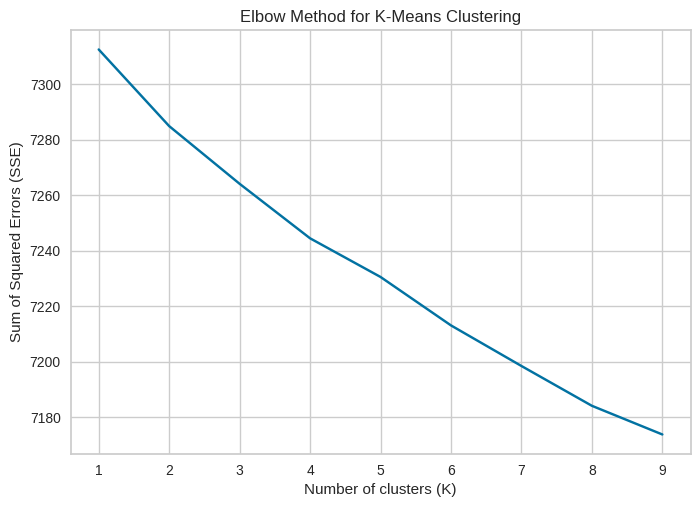

In [ ]:
# Create a list to store the sum of squared errors for each K value
Sum_of_Squared_Errors = []

# Iterate over range of K values and compute SSE for each value
for k in range(1, 10):
    # Initialize the k-means model with the current value of K
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Compute the sum of squared errors for the model
    Sum_of_Squared_Errors.append(kmeans.inertia_)

# Plot the SSE values against the range of K values
plt.plot(range(1, 10), Sum_of_Squared_Errors)
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

I have narrowed down the range of possible number of clusters to be between 4 to 7, as the slope of the elbow plot is steep at this range. To determine the optimal number of clusters, I will check the silhouette scores for each value in this range and choose the one with the highest score.

In [ ]:
def silhouette_score_analysis(n):
  silhouette_avg = []
  for k in range(2, n):
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    preds = kmeans.fit_predict(x)
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    silhouette_avg.append(score)

    score = silhouette_score(x, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

    visualizer = SilhouetteVisualizer(kmeans)

    visualizer.fit(x) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.003070292749061931


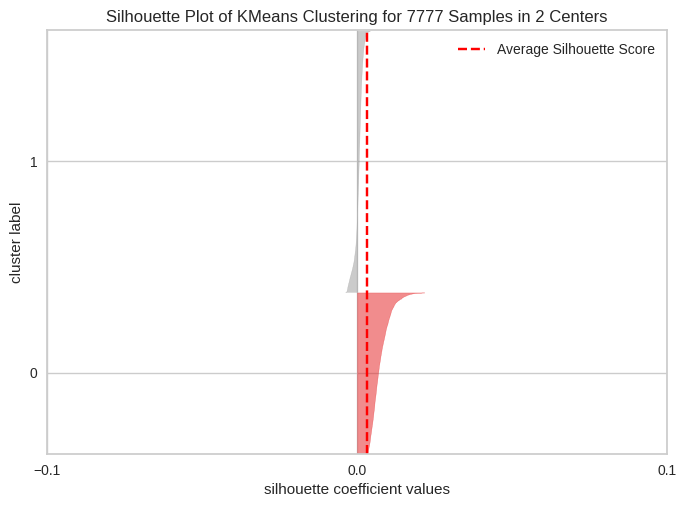

For n_clusters = 3, silhouette score is 0.0028423483618146175


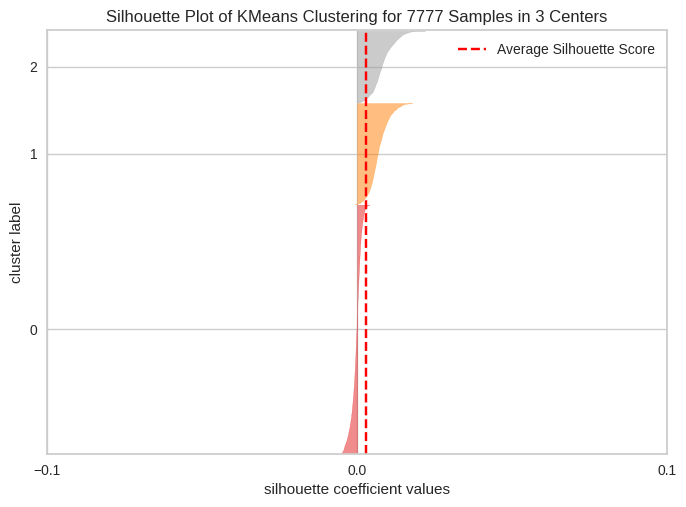

For n_clusters = 4, silhouette score is 0.003534349388966


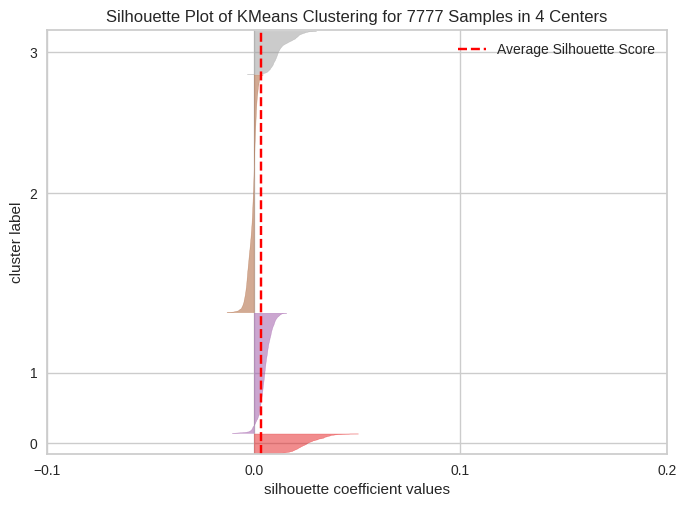

For n_clusters = 5, silhouette score is 0.00475043401217235


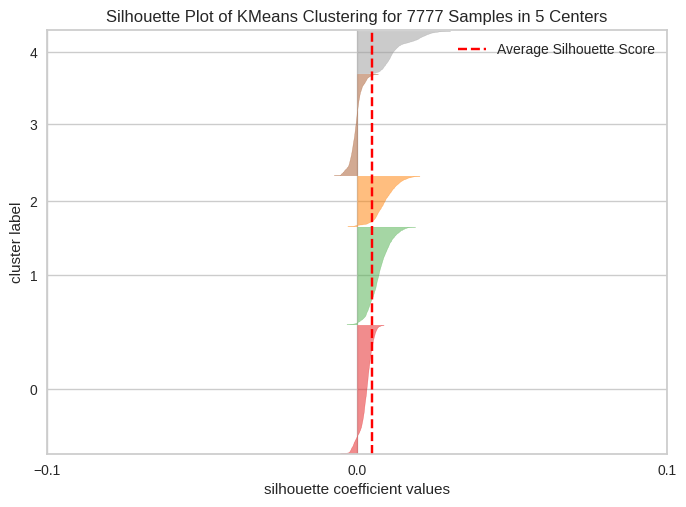

For n_clusters = 6, silhouette score is 0.004366282558345718


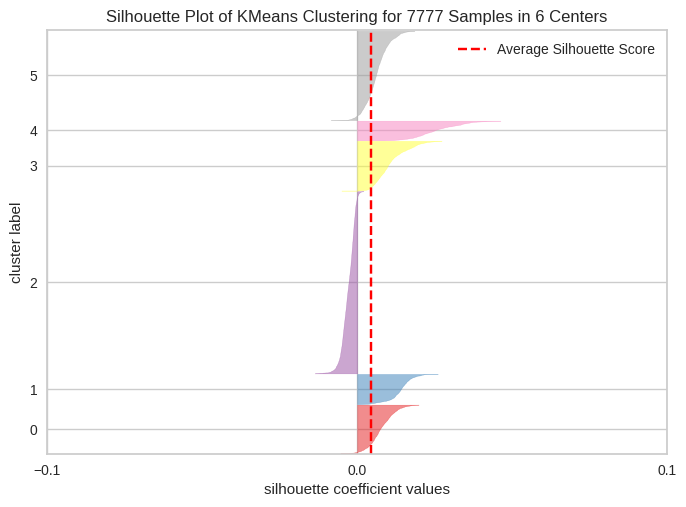

For n_clusters = 7, silhouette score is 0.0045772569999782825


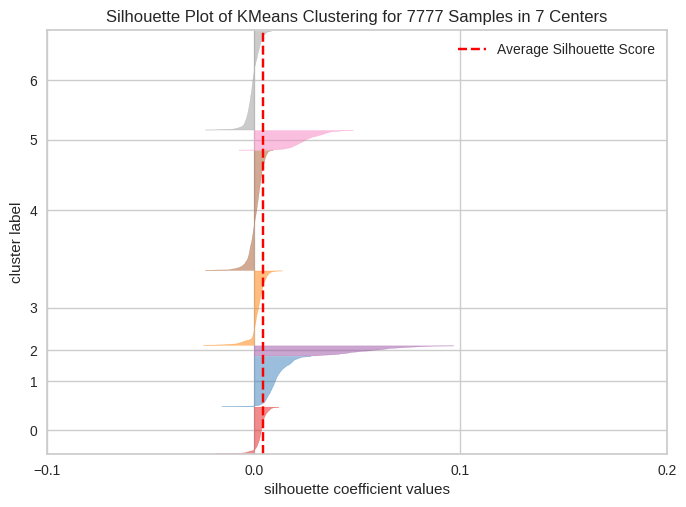

For n_clusters = 8, silhouette score is 0.00491016617726211


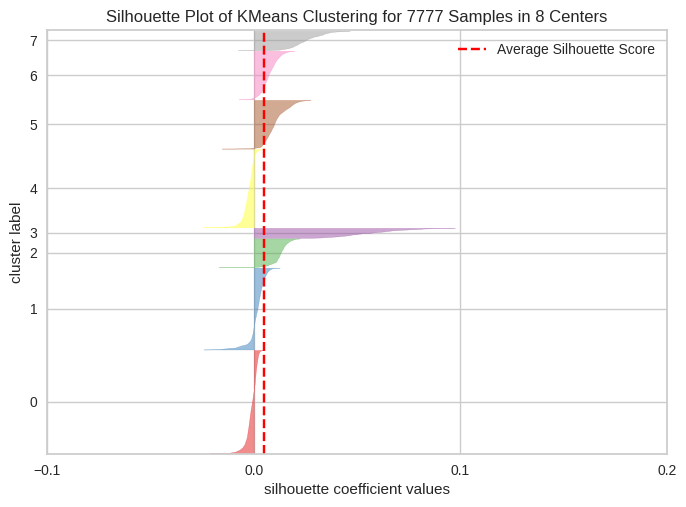

For n_clusters = 9, silhouette score is 0.00545268362080902


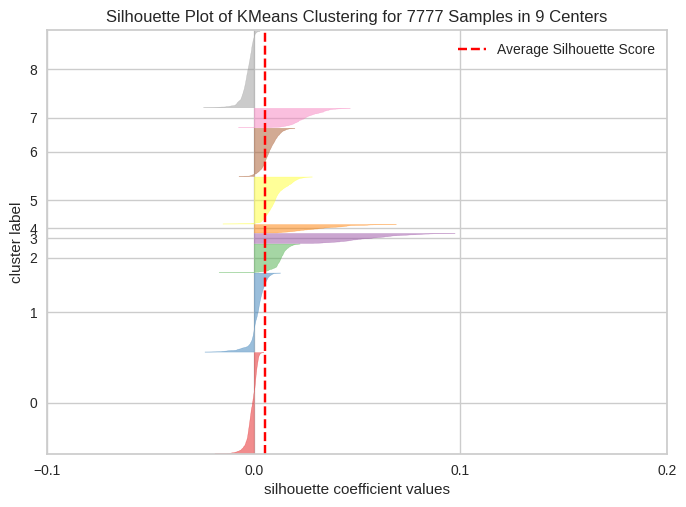

In [ ]:
silhouette_score_analysis(10)

In the above silhouette score visualization, we can observe that all values range between 0 and 1, indicating that the clusters formed are well-defined and separated, and hence are considered good

For n_clusters = 2, silhouette score is 0.003070292749061931
For n_clusters = 3, silhouette score is 0.0028423483618146175
For n_clusters = 4, silhouette score is 0.003534349388966
For n_clusters = 5, silhouette score is 0.00475043401217235
For n_clusters = 6, silhouette score is 0.004366282558345718
For n_clusters = 7, silhouette score is 0.0045772569999782825


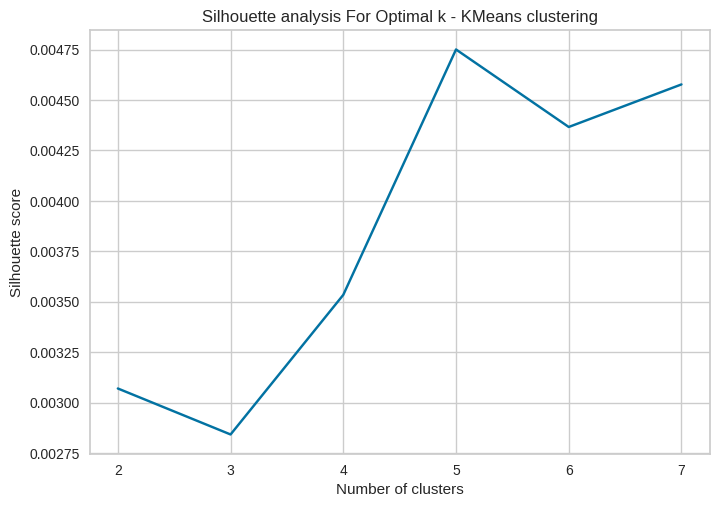

In [ ]:
# Silhouette score method to find the optimal value of k
# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

# Define a list of possible number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7]

# Loop through each value of k
for n_clusters in range_n_clusters:
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    # Append the silhouette score to the list of scores
    silhouette_avg.append(score)
    # Print the silhouette score for the current value of k
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

# Plot the Silhouette analysis
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

Here 5 clusters receive the highest Silhouette score overall.
Utilising the k-means clustering algorithm to create 5 clusters.

In [ ]:
# ML Model - 1 Implementation
# Initialize the KMeans model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(x)               # Fit the Algorithm
y_kmeans = kmeans_model.predict(x)# Predict on the model
labels = kmeans_model.labels_     # Get the cluster labels for each point in the data
unique_labels = np.unique(labels) # Get the unique cluster labels

In [ ]:
df['kmeans_cluster'] = labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
scores_dict_kmeans = evaluate_clustering_model(kmeans_model, x, y_kmeans)

Number of clusters: 5
Silhouette score: 0.0048
Calinski-Harabasz score: 22.0479
Davies-Bouldin score: 13.9355
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        |  0.00475043 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score | 22.0479     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    | 13.9355     |
+----+-------------------------+-------------+


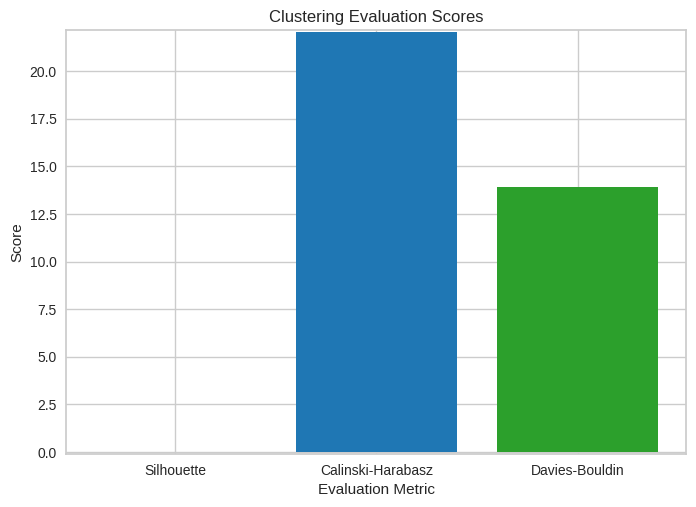

In [ ]:
# Visualizing evaluation Metric Score chart
plot_clustering_scores(scores_dict_kmeans)

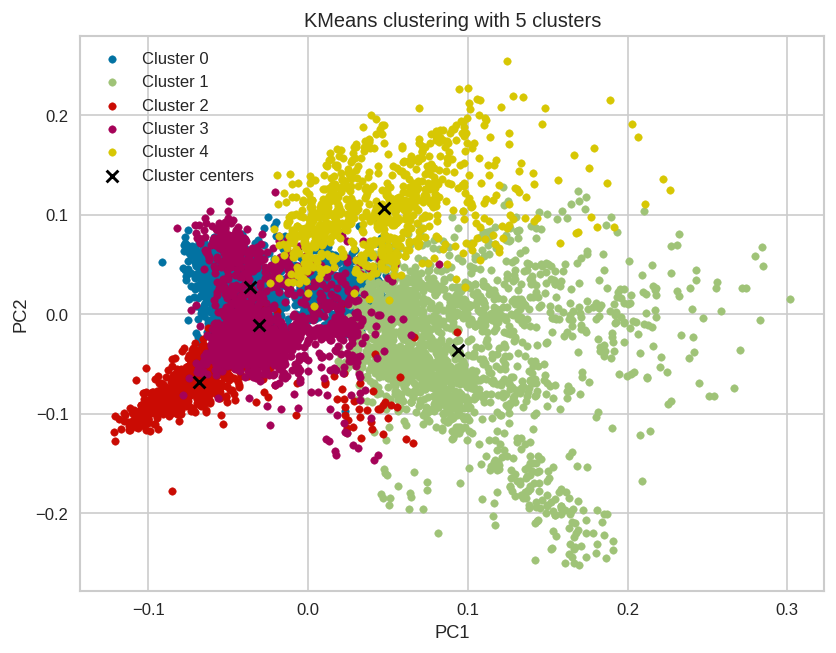

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(x[labels == i, 0], x[labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=50,marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Building wordclouds for different clusters built:

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

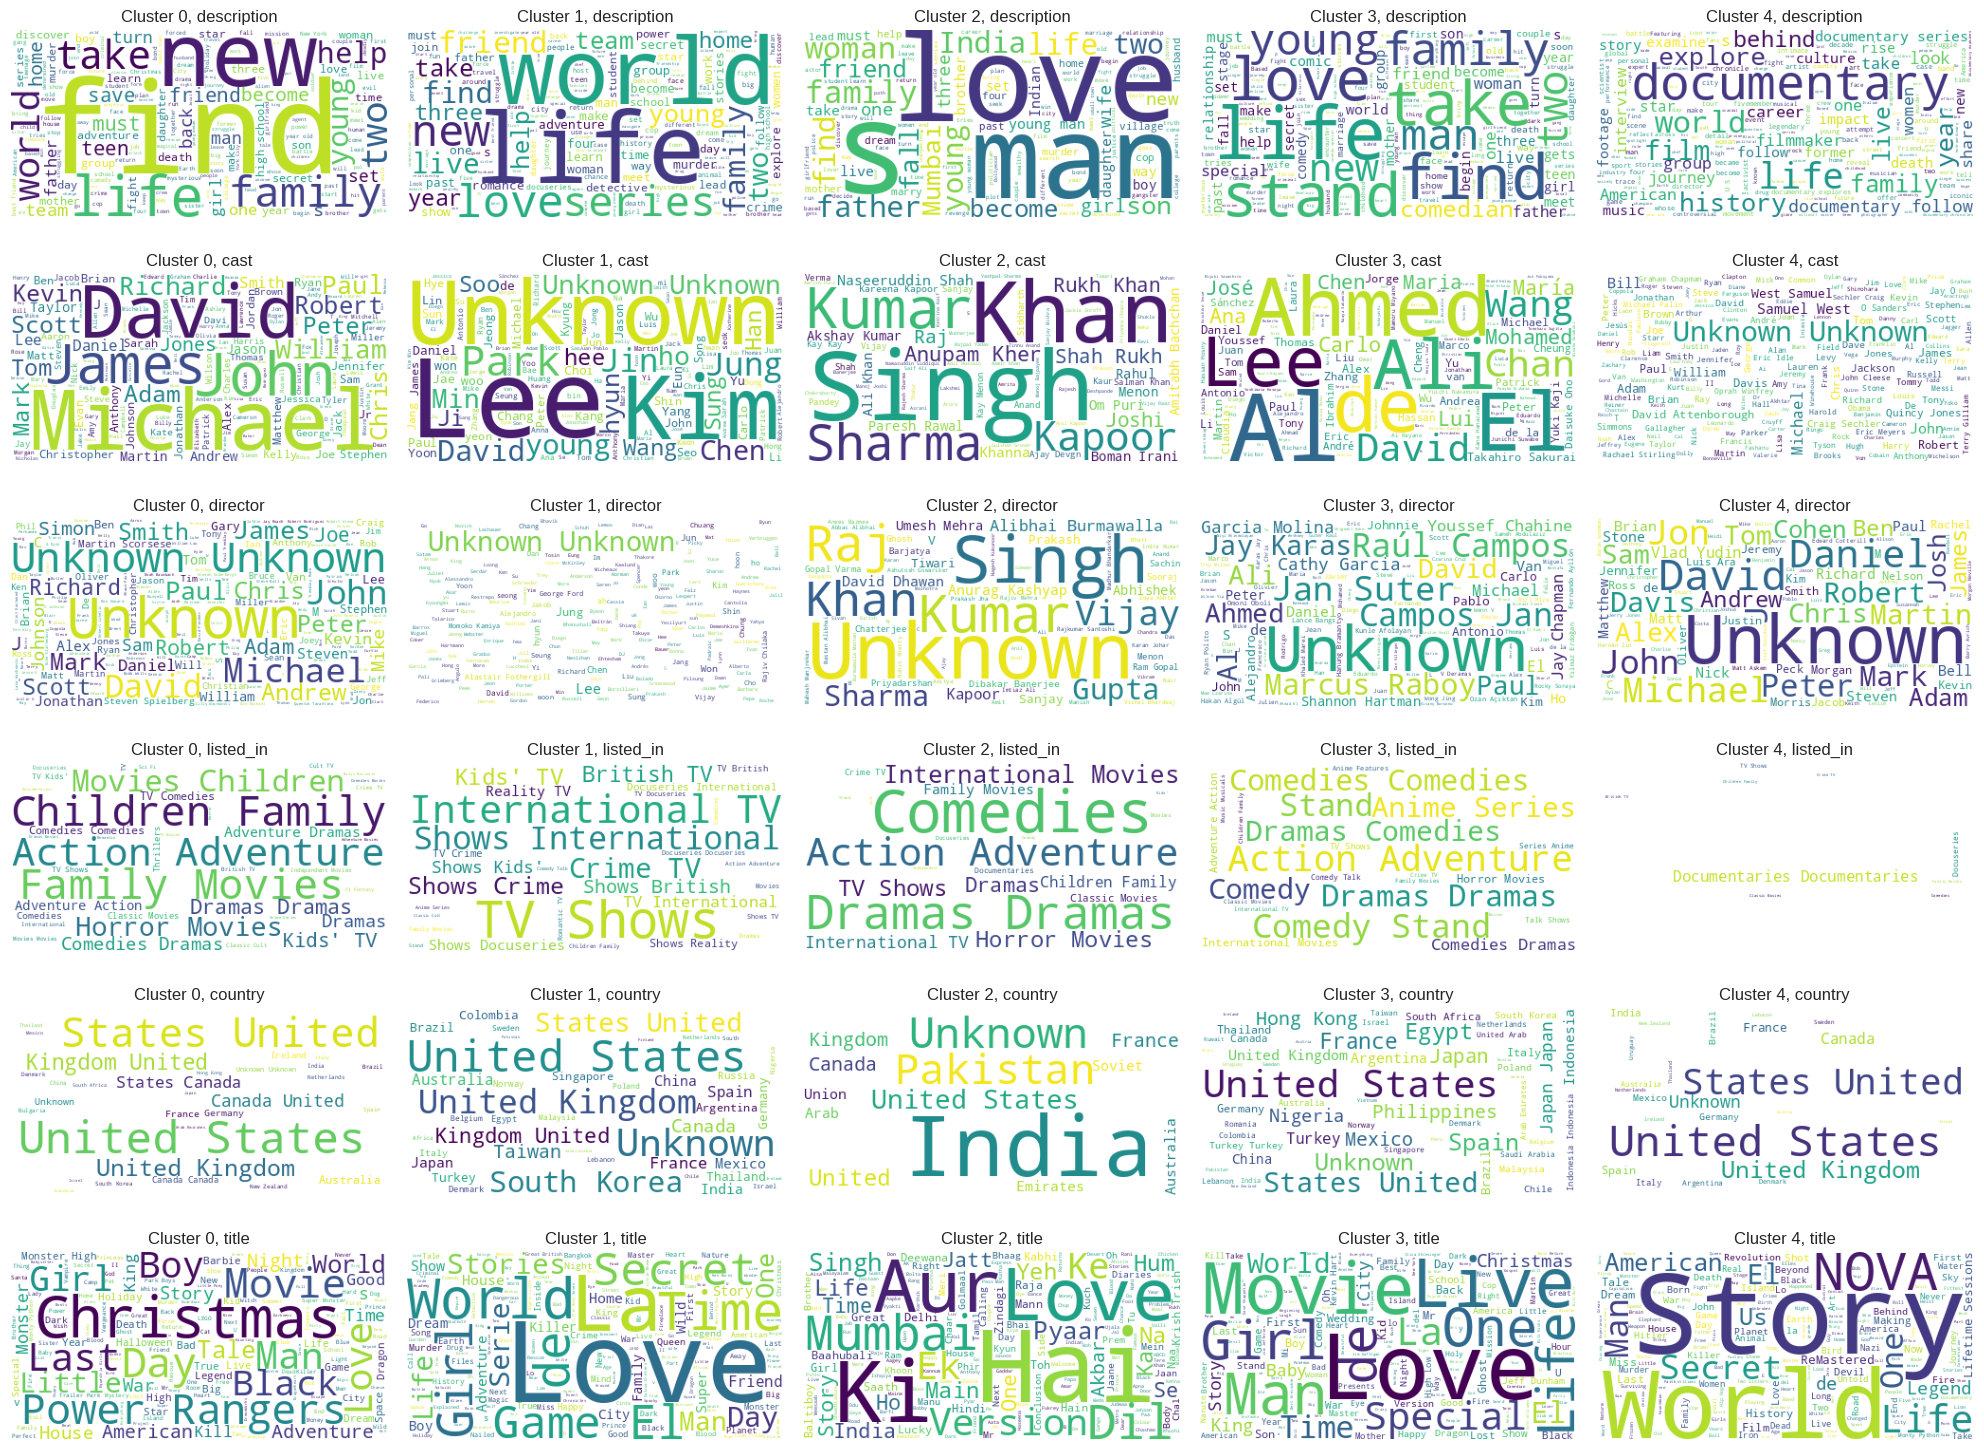

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

### ML Model - 2 HIERARCHICAL CLUSTERING

In k Means we have to define the no of cluster but in hierarchical clustering takes away the problem of having to pre-define the number of clusters. Uses the agglomerative (hierarchical) clustering process for building clusters. Using the dendrogram to visualize the agglomerative (hierarchical) clustering process to determine the ideal number of clusters.

Building a dendogram to decide on the number of clusters

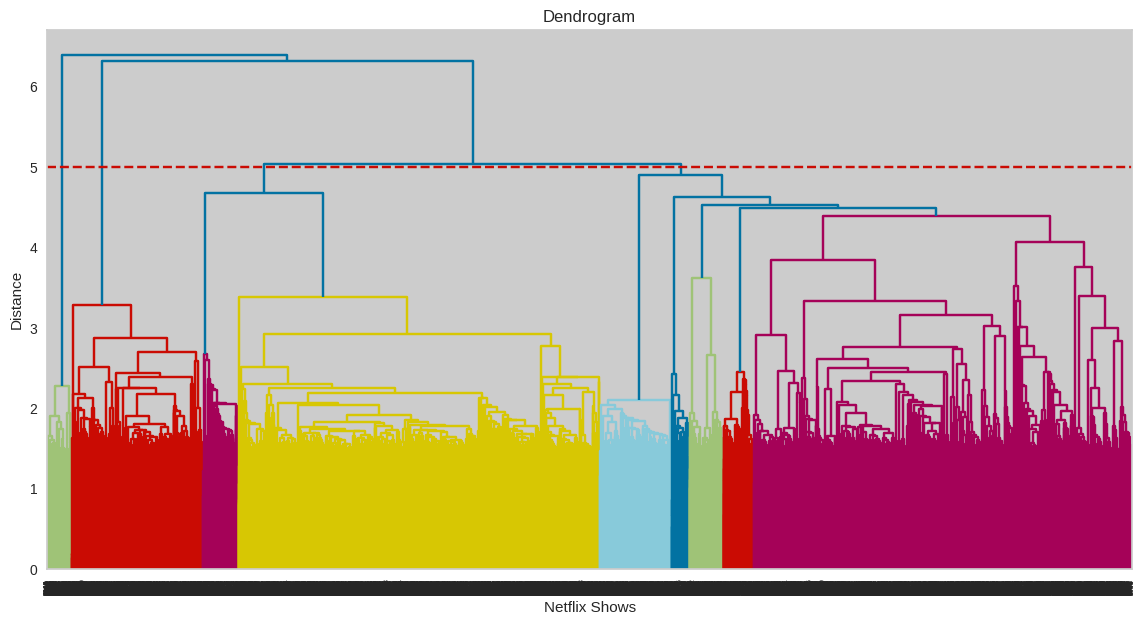

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as shc

# Instantiate the dendogram
plt.figure(figsize=(14, 7))
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

Here we can see that Horizontal line cutting 5 branches. So we will choose number of clusters as 5.

In [ ]:
# ML Model - 2  Implementation
# Initialize the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(x)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(x, hierarchical_labels)   # Calculate the silhouette score
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.001569954887699354


In [ ]:
df['hierarchical_cluster'] = hierarchical_labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

scores_dict_hierarchical = evaluate_clustering_model(hierarchical_model, x, y_hierarchical)

Number of clusters: 5
Silhouette score: 0.0016
Calinski-Harabasz score: 17.3983
Davies-Bouldin score: 14.4474
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        |  0.00156995 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score | 17.3983     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    | 14.4474     |
+----+-------------------------+-------------+


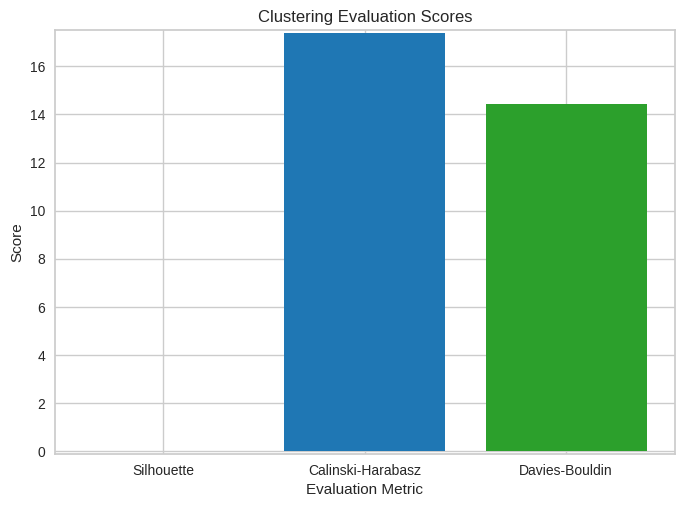

In [ ]:
# Visualizing evaluation Metric Score chart
plot_clustering_scores(scores_dict_hierarchical)

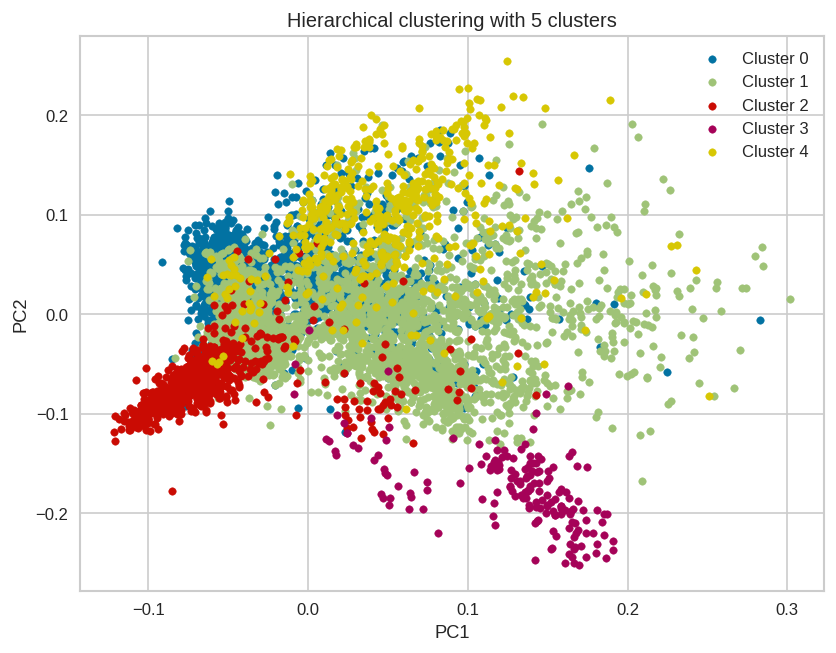

In [ ]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_h:
    plt.scatter(x[hierarchical_labels == i, 0], x[hierarchical_labels == i, 1], s=20, label='Cluster {}'.format(i))

plt.title('Hierarchical clustering with {} clusters'.format(len(unique_labels_h)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


Building wordclouds for different clusters

In [ ]:
def hierarchical_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['hierarchical_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud

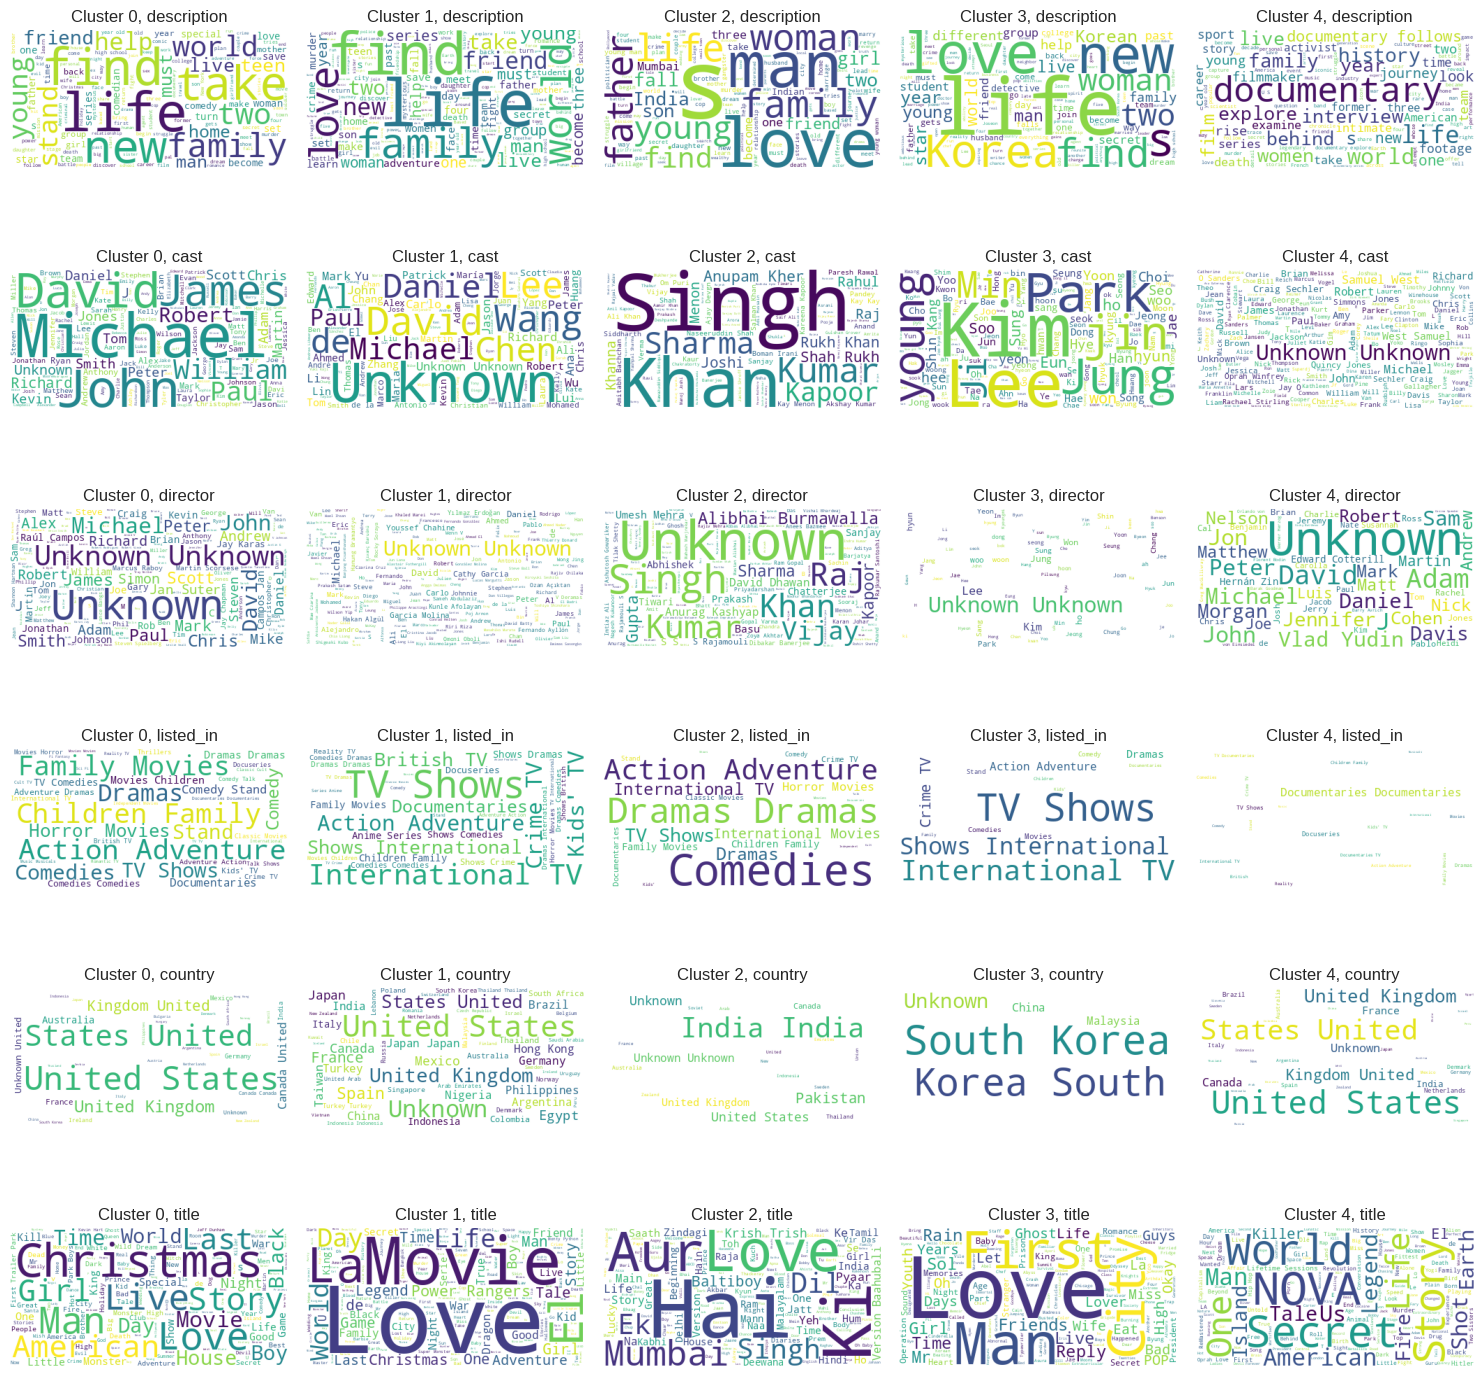

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(hierarchical_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

### ML Model - 3 RECOMMENDATION SYSTEM

A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
We can use cosine similarity to determine the shows' similarity scores.
By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.

In [ ]:
# ML Model - 3 Implementation
# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_df['text'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def generate_recommendations(title, cosine_sim=cosine_sim, data=new_df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)),
                             columns=['Recommended movie', 'Similarity score (0-1)'])

    return rec_table

In [ ]:
generate_recommendations('Phir Hera Pheri')

Recommended movie  Similarity score (0-1)
0         Bhool Bhulaiyaa                  0.2308
1               Thank You                  0.1999
2    Darr Sabko Lagta Hai                  0.1938
3  Golmaal: Fun Unlimited                  0.1934
4             Bhagam Bhag                  0.1852
5            Chup Chup Ke                  0.1794
6                   Ready                  0.1783
7    Life Ki Toh Lag Gayi                  0.1696
8                  Khushi                  0.1612
9           Hello Brother                  0.1593

In [ ]:
generate_recommendations('Peaky Blinders')

Recommended movie  Similarity score (0-1)
0                      Inception                  0.1578
1                      Rebellion                  0.1299
2                  Transcendence                  0.1244
3  Jonathan Strange & Mr Norrell                  0.1078
4            Thorne: Scaredy Cat                  0.1031
5              Eddie Murphy: Raw                  0.0985
6        Eddie Murphy: Delirious                  0.0962
7                         Loaded                  0.0959
8               Caught on Camera                  0.0941
9                      Free Fire                  0.0915

In [ ]:
generate_recommendations('The Darkness')

Recommended movie  Similarity score (0-1)
0            The Forty-Year-Old Version                  0.1100
1  Ariana grande: excuse me, i love you                  0.1016
2                             Incarnate                  0.1014
3       Marvel's Agents of S.H.I.E.L.D.                  0.1011
4                       Stranger Things                  0.0986
5                              Aquarius                  0.0958
6                            Santa Girl                  0.0956
7                         Monster House                  0.0932
8  Kung Fu Panda: Secrets of the Scroll                  0.0908
9                            Prom Night                  0.0880

### ML Model - 3 DBSCAN Clustering


In [ ]:
# Create an instance of DBSCAN with specified hyperparameters
dbscan_model = DBSCAN(eps=0.7, min_samples=3)
dbscan_model.fit(x) # Fit the model to the input data
y_dbscan = dbscan_model.labels_ # Get the predicted cluster labels for the input data
dbscan_labels = dbscan_model.labels_
unique_labels_dbscan = np.unique(dbscan_labels)
print(y_dbscan)

[-1 -1 -1 ... -1 -1 -1]


In [ ]:
df['dbscan_cluster'] = dbscan_labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
scores_dict_dbscan = evaluate_clustering_model(dbscan_model, x, y_dbscan)

Number of clusters: 16
Silhouette score: -0.0143
Calinski-Harabasz score: 2.9342
Davies-Bouldin score: 1.4198
+----+-------------------------+------------+
|    | Evaluation Metric       |      Score |
+====+=========================+============+
|  0 | Silhouette Score        | -0.0143161 |
+----+-------------------------+------------+
|  1 | Calinski-Harabasz Score |  2.93423   |
+----+-------------------------+------------+
|  2 | Davies-Bouldin Score    |  1.41976   |
+----+-------------------------+------------+


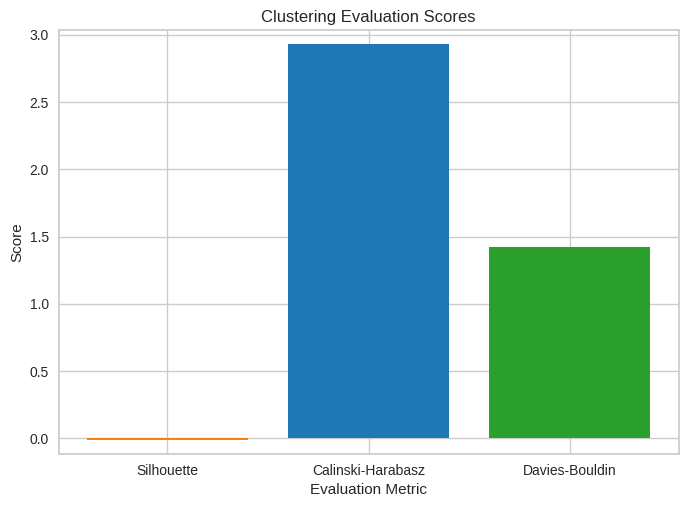

In [ ]:
# Visualizing evaluation Metric Score chart
plot_clustering_scores(scores_dict_dbscan)

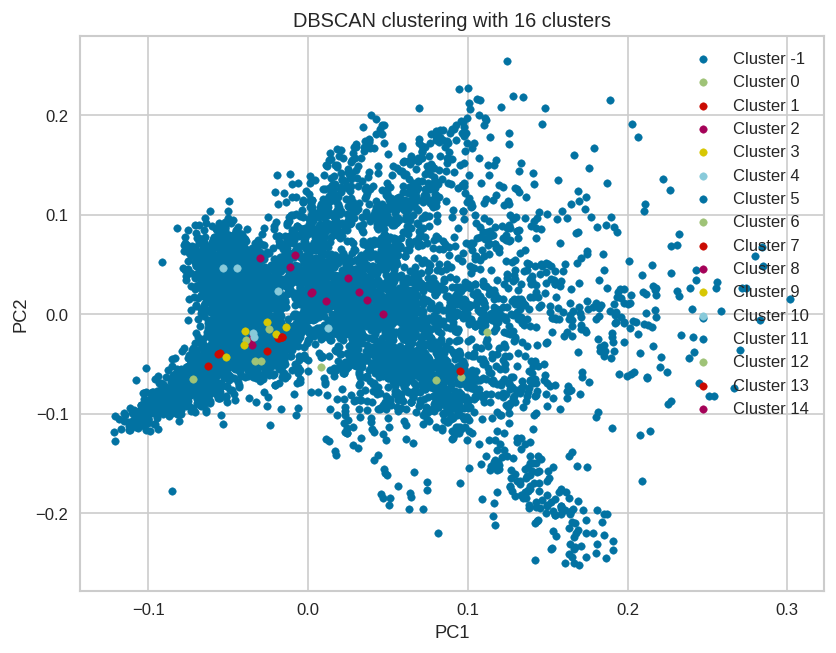

In [ ]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_dbscan:
    plt.scatter(x[dbscan_labels == i, 0], x[dbscan_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.title('DBSCAN clustering with {} clusters'.format(len(unique_labels_dbscan)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
def dbscan_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['dbscan_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['dbscan_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud


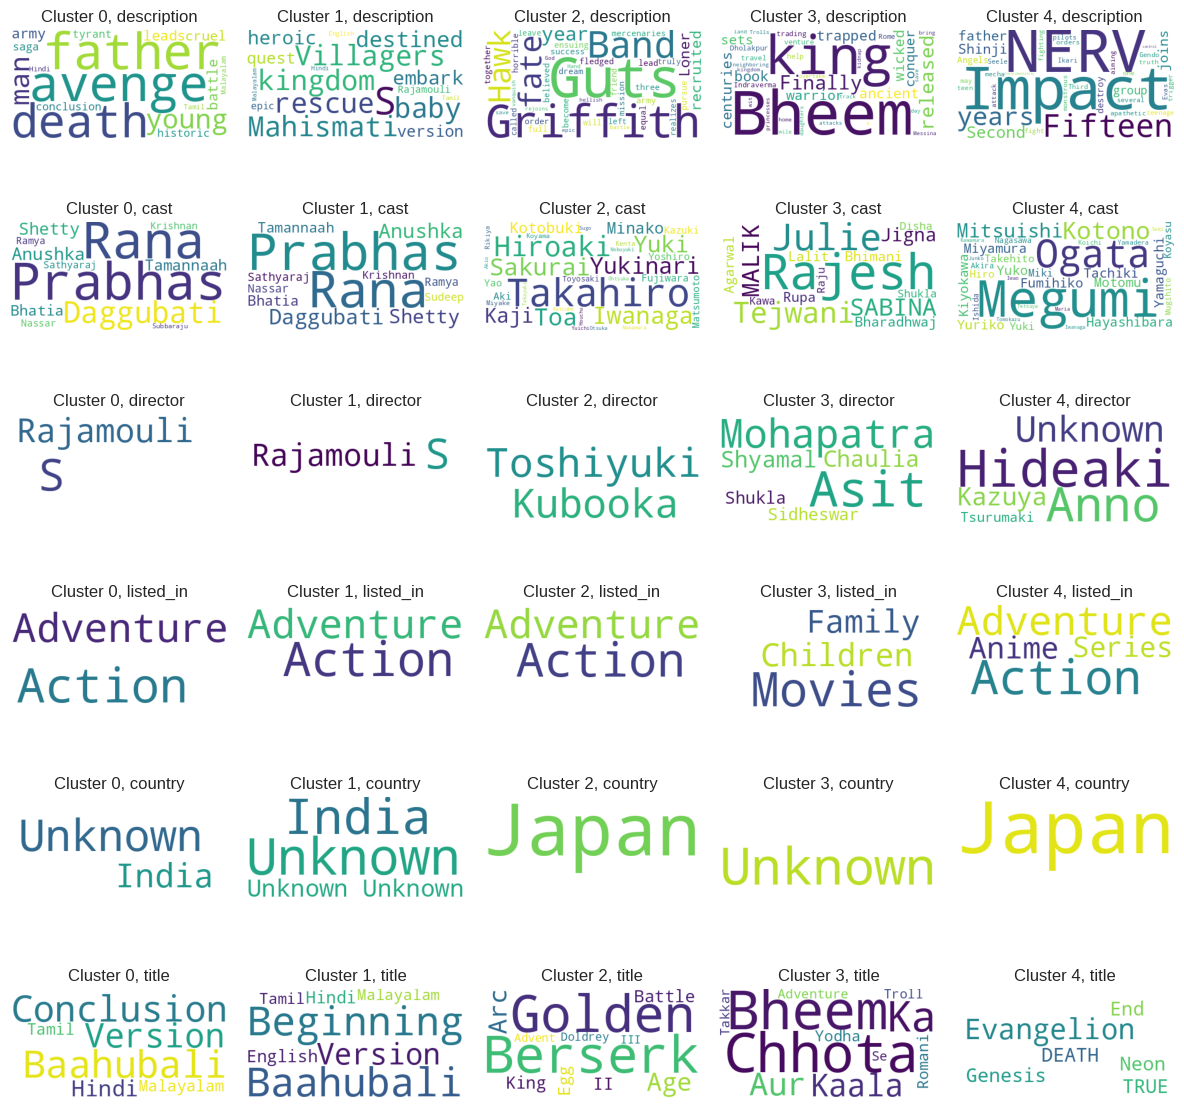

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(12,12))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(dbscan_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?



**Silhouette score** is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.

Due to its ability to determine the ideal number of clusters for a given dataset, silhouette score is a valuable statistic for positive business effect. Hence, by using the unique patterns and characteristics of each cluster, businesses may use this information to make data-driven decisions and more effectively allocate resources.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing metrics in order to make dataframe of metrics
Model          = ['K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN Clustering']
S_score  = [0.0047, 0.0015, -0.0148]
CH_score = [22.0479, 17.3983, 2.9342]
DB_score = [13.9355, 14.4414, 1.4198]
No_of_cluster = [7, 5, 17]
# Create dataframe from the lists
data = {'Model' : Model,
        'Number of clusters': No_of_cluster,
        'silhouette_score'  : S_score,
        'calinski_harabasz_score': CH_score,
        'davies_bouldin_score': DB_score}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

Model  Number of clusters  silhouette_score  \
0       K-Means Clustering                   7            0.0047   
1  Hierarchical Clustering                   5            0.0015   
2        DBSCAN Clustering                  17           -0.0148   

   calinski_harabasz_score  davies_bouldin_score  
0                  22.0479               13.9355  
1                  17.3983               14.4414  
2                   2.9342                1.4198

Following the evaluation of several machine learning models, such as the Recommender System, DBSCAN Clustering, Hierarchical Clustering - Agglomerative, and K-Means Clustering, we ultimately decided to choose K-Means Clustering as our prediction model.

We choose K-Means Clustering because it demonstrated good accuracy and processing efficiency on our evaluation dataset. We were able to provide our users with more insightful recommendations since the algorithm was able to group together films and TV series that shared comparable qualities. Furthermore, K-Means Clustering was a feasible option for our project because it was not too difficult to set up and maintain.

Although DBSCAN Clustering and Hierarchical Clustering - Agglomerative also produced encouraging results, they were more computationally expensive and took longer to complete. However, the Recommender System's capacity to group TV series and films according to common characteristics was constrained, and it was mostly dependent on user activity data for recommendation purposes.

The K-Means Clustering Model is better than Hierarchical Clustering in terms of the calinski_harabasz_score (higher than others) and Davies-Bouldin score (lower than others), while DBSCAN Clustering also produces an excellent silhouette score.

Because of K-Means Clustering's precision, effectiveness, and usefulness in providing suggestions to our users, we ultimately decided to choose it as our prediction model.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
filename='NETFLIX MOVIES AND TV SHOWS CLUSTERING.pkl'

# serialize process (wb=write byte)
pickle.dump(kmeans_model,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# unserialize process (rb=read byte)
kmeans_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data
kmeans_model.predict(x)

array([1, 3, 0, ..., 4, 1, 4], dtype=int32)

In [ ]:
y_kmeans

array([1, 3, 0, ..., 4, 1, 4], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**CONCLUSION FROM EDA:**

Netflix offers a greater selection of movies than television series.

Most of the content on Netflix has a TV-MA rating, meaning that it is appropriate for mature audiences.


The United States leads India and the United Kingdom in the quantity of productions that are available on Netflix.

Dramas are the most popular genre on Netflix, with comedies and documentaries coming in second and third.

Love, family, youth, life, and world are among the most often used terms in Netflix movie descriptions, according to the Wordcloud visualization of movie descriptions.

The correlation heatmap demonstrates a somewhat favorable association between a film's runtime and the year of release.

The pairplot displays numerous intriguing relationships between the variables, including a negative correlation between a movie's runtime and rating and a substantial positive correlation between the number of reviews and the year of release.



**CONCLUSION FROM MODEL IMPLEMENTATION:**

The attributes of director, cast, nation, genre, rating, and description were used to cluster the data.

After preprocessing, tokenizing, and vectorizing the values of these attributes with TFIDF vectorizer, a total of 10,000 attributes were produced.

In order to minimize the dimensionality of the data and capture more than 95% of the variance, Principal Component Analysis (PCA) was employed.

Based on the elbow technique and Silhouette score analysis, the ideal number of clusters to be created using the K-Means Clustering algorithm was 5.

Based on the dendrogram visualization, the agglomerative clustering technique was utilized to create clusters, with five being the ideal number.

Cosine similarity was used to create a content-based recommender system that will provide the user with ten suggestions based on the kind of show they watch

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***